In [1]:
import pandas as pd

# Carregar datasets
saneamento = pd.read_csv("Documents/dataset_saneamento_estado.csv")
dengue = pd.read_csv("Documents/dataset_dengue.csv")

In [2]:
populacao = pd.read_csv("Documents/SP_mun_população.csv")

In [3]:
# Conferir colunas disponíveis
print(saneamento.columns)
print(dengue.columns)

Index(['CD_MUN', 'NM_MUN_x', 'V00001', 'V00002', 'V00003', 'V00004', 'V00005',
       'V00006', 'V00007', 'V00047',
       ...
       'V00612', 'V00613', 'V00614', 'V00615', 'V00616', 'V00617', 'V00636',
       'V00637', 'V00638', 'V00639'],
      dtype='object', length=101)
Index(['CD_MUN', 'NM_MUN_x', 'DRS__0_level_1__0', 'DRS__1_level_1__1',
       'GVE__2_level_1__2', 'GVE__3_level_1__3',
       'Região_de_Saúde__4_level_1__4', 'Região_de_Saúde__5_level_1__5',
       'Janeiro_notificados__7', 'Janeiro_confirmados_autóctones',
       'Janeiro_confirmados_importados', 'Fevereiro_notificados__10',
       'Fevereiro_confirmados_autóctones', 'Fevereiro_confirmados_importados',
       'Março_notificados__13', 'Março_confirmados_autóctones',
       'Março_confirmados_importados', 'Abril_notificados__16',
       'Abril_confirmados_autóctones', 'Abril_confirmados_importados',
       'Maio_notificados__19', 'Maio_confirmados_autóctones',
       'Maio_confirmados_importados', 'Junho_notificad

In [4]:
# Fazer o merge (união) dos dados
dados = pd.merge(dengue, saneamento, on="CD_MUN", how="inner")

dados.head()

,CD_MUN,NM_MUN_x_x,DRS__0_level_1__0,DRS__1_level_1__1,GVE__2_level_1__2,GVE__3_level_1__3,Região_de_Saúde__4_level_1__4,Região_de_Saúde__5_level_1__5,Janeiro_notificados__7,Janeiro_confirmados_autóctones,...,V00612,V00613,V00614,V00615,V00616,V00617,V00636,V00637,V00638,V00639
0,3500105,Adamantina,9,Marília,XIX,MARÍLIA,35091.0,ADAMANTINA,23,9,...,33127,877,263,37,0,189,27,1047,0,75
1,3500204,Adolfo,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,102,49,...,4186,83,78,4,0,0,186,324,9,36
2,3500303,Aguaí,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,9,2,...,29194,1081,1242,64,4,413,232,2030,19,326
3,3500402,Águas da Prata,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,0,0,...,6866,283,96,0,0,13,79,662,15,86
4,3500501,Águas de Lindóia,7,Campinas,XVII,CAMPINAS,35074.0,CIRCUITO DAS AGUAS,1,0,...,16777,882,95,6,0,29,364,715,20,72


In [5]:
# Descrição do novo conjunto de dados
dados.describe()

,CD_MUN,DRS__0_level_1__0,Região_de_Saúde__4_level_1__4,Janeiro_notificados__7,Janeiro_confirmados_autóctones,Janeiro_confirmados_importados,Fevereiro_notificados__10,Fevereiro_confirmados_autóctones,Fevereiro_confirmados_importados,Março_notificados__13,...,V00612,V00613,V00614,V00615,V00616,V00617,V00636,V00637,V00638,V00639
count,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,...,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.00000,644.000000,644.000000
mean,3.528653e+06,9.709627,35099.706522,36.725155,11.793478,0.454969,43.951863,23.833851,0.543478,150.649068,...,6.140737e+04,6365.012422,464.855590,26.444099,81.251553,102.037267,606.215839,2382.77795,66.723602,298.498447
std,1.667514e+04,4.998087,50.236262,128.792915,58.663412,2.441761,144.961246,95.940780,2.232860,487.817762,...,4.228468e+05,43660.917802,556.217686,42.625590,939.421608,382.244239,2106.284817,4632.98698,260.946002,678.658528
min,3.500105e+06,1.000000,35011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.514576e+06,6.000000,35062.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,4.687750e+03,133.000000,128.750000,4.000000,0.000000,7.000000,58.000000,466.00000,3.000000,49.000000
50%,3.528650e+06,9.000000,35095.000000,5.000000,0.500000,0.000000,7.000000,1.000000,0.000000,25.000000,...,1.112850e+04,421.500000,264.500000,14.000000,3.000000,33.000000,192.000000,1010.00000,17.000000,112.000000
75%,3.543130e+06,15.000000,35153.000000,21.000000,3.250000,0.000000,26.500000,10.000000,0.000000,96.750000,...,3.576775e+04,1679.000000,604.750000,30.000000,12.250000,97.250000,523.500000,2563.00000,54.000000,305.000000
max,3.557204e+06,17.000000,35174.000000,1861.000000,1035.000000,40.000000,2106.000000,1356.000000,33.000000,6969.000000,...,1.043332e+07,923195.000000,4992.000000,513.000000,23226.000000,7757.000000,38436.000000,64836.00000,5245.000000,11187.000000


In [6]:
# Merge (união) com o conjunto de dados que possui a população de cada município
dados_pop = pd.merge(dados, populacao, on="CD_MUN", how="inner")

dados_pop.head()

,CD_MUN,NM_MUN_x_x,DRS__0_level_1__0,DRS__1_level_1__1,GVE__2_level_1__2,GVE__3_level_1__3,Região_de_Saúde__4_level_1__4,Região_de_Saúde__5_level_1__5,Janeiro_notificados__7,Janeiro_confirmados_autóctones,...,V00637,V00638,V00639,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,NM_MUN,Total_setores,População
0,3500105,Adamantina,9,Marília,XIX,MARÍLIA,35091.0,ADAMANTINA,23,9,...,1047,0,75,3,Sudeste,35,São Paulo,Adamantina,107,34687
1,3500204,Adolfo,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,102,49,...,324,9,36,3,Sudeste,35,São Paulo,Adolfo,16,4351
2,3500303,Aguaí,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,9,2,...,2030,19,326,3,Sudeste,35,São Paulo,Aguaí,63,32072
3,3500402,Águas da Prata,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,0,0,...,662,15,86,3,Sudeste,35,São Paulo,Águas da Prata,24,7369
4,3500501,Águas de Lindóia,7,Campinas,XVII,CAMPINAS,35074.0,CIRCUITO DAS AGUAS,1,0,...,715,20,72,3,Sudeste,35,São Paulo,Águas de Lindóia,49,17930


In [7]:
# Criação do coeficiente de incidência de dengue (dividindo o total de casos autóctones de dengue no município
# por sua população)
dados_pop['Total_autoctone_ponderado'] = dados_pop['Total_confirmados_autóctones'] / dados_pop['População']

# Conferir o resultado
dados_pop[['Total_confirmados_autóctones', 'População'] + ['Total_autoctone_ponderado']].head()

,Total_confirmados_autóctones,População,Total_autoctone_ponderado
0,1357,34687,0.039121
1,176,4351,0.040450
2,5,32072,0.000156
3,0,7369,0.000000
4,11,17930,0.000613


In [8]:
# Eliminação de algumas colunas redundantes ou não relevantes
dados_pop.drop(['CD_REGIAO','NM_REGIAO','CD_UF','NM_UF', 'NM_MUN', 'Total_setores'], axis=1)

,CD_MUN,NM_MUN_x_x,DRS__0_level_1__0,DRS__1_level_1__1,GVE__2_level_1__2,GVE__3_level_1__3,Região_de_Saúde__4_level_1__4,Região_de_Saúde__5_level_1__5,Janeiro_notificados__7,Janeiro_confirmados_autóctones,...,V00614,V00615,V00616,V00617,V00636,V00637,V00638,V00639,População,Total_autoctone_ponderado
0,3500105,Adamantina,9,Marília,XIX,MARÍLIA,35091.0,ADAMANTINA,23,9,...,263,37,0,189,27,1047,0,75,34687,0.039121
1,3500204,Adolfo,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,102,49,...,78,4,0,0,186,324,9,36,4351,0.040450
2,3500303,Aguaí,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,9,2,...,1242,64,4,413,232,2030,19,326,32072,0.000156
3,3500402,Águas da Prata,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,0,0,...,96,0,0,13,79,662,15,86,7369,0.000000
4,3500501,Águas de Lindóia,7,Campinas,XVII,CAMPINAS,35074.0,CIRCUITO DAS AGUAS,1,0,...,95,6,0,29,364,715,20,72,17930,0.000613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,3556958,Vitória Brasil,15,São José do Rio Preto,XXX,JALES,35153.0,JALES,24,24,...,114,0,0,0,16,253,0,17,1794,0.045708
640,3557006,Votorantim,16,Sorocaba,XXXI,SOROCABA,35163.0,SOROCABA,132,0,...,207,4,10,134,231,3791,12,622,127923,0.005128
641,3557105,Votuporanga,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35157.0,VOTUPORANGA,1077,586,...,974,61,17,174,322,2526,14,243,96634,0.104021
642,3557154,Zacarias,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,5,1,...,216,26,0,176,53,510,0,59,2692,0.044205


In [9]:
# Variáveis de saneamento - Domicílios com determinadas características com relação a água, lixo e esgoto
cols_saneamento = ['V00111', 'V00112', 'V00113', 'V00114', 'V00115', 'V00116', 'V00117', 'V00118', 'V00199', 'V00200', 'V00201', 
             'V00309', 'V00310', 'V00311', 'V00312', 'V00313', 'V00314', 'V00315', 'V00316',
             'V00397', 'V00398', 'V00399', 'V00400', 'V00401', 'V00402', 'V00463', 'V00464']
# Criar novas colunas com os índices (divisão pelo total de domicílios)
for col in cols_saneamento:
    dados_pop[f'{col}_idx'] = dados_pop[col] / dados_pop['V00004']

# Conferir o resultado
dados_pop[['CD_MUN', 'V00004'] + [f'{c}_idx' for c in cols_saneamento]].head()

,CD_MUN,V00004,V00111_idx,V00112_idx,V00113_idx,V00114_idx,V00115_idx,V00116_idx,V00117_idx,V00118_idx,...,V00315_idx,V00316_idx,V00397_idx,V00398_idx,V00399_idx,V00400_idx,V00401_idx,V00402_idx,V00463_idx,V00464_idx
0,3500105,13567,0.970443,0.024913,0.003096,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.958944,0.026461,0.006929,0.000884,0.0,0.005012,0.000295,0.027935
1,3500204,1650,0.881818,0.103030,0.007879,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.961818,0.017576,0.018182,0.000000,0.0,0.000000,0.042424,0.069091
2,3500303,11480,0.933537,0.038240,0.019164,0.006707,0.000436,0.0,0.0,0.0,...,0.000958,0.0,0.918990,0.029268,0.035192,0.001307,0.0,0.011672,0.006707,0.058449
3,3500402,2830,0.897527,0.016608,0.004240,0.075265,0.000000,0.0,0.0,0.0,...,0.002473,0.0,0.945230,0.038163,0.011661,0.000000,0.0,0.001413,0.008127,0.089753
4,3500501,6799,0.941021,0.015002,0.003530,0.034270,0.000000,0.0,0.0,0.0,...,0.000441,0.0,0.941756,0.048831,0.003971,0.000000,0.0,0.000441,0.018679,0.037064


In [10]:
# Baixar o conjunto de dados como CSV
dados_pop.to_csv('RP2dados_unidos.csv', index=False)

In [11]:
# PRIMEIRA ANÁLISE: Selecionar colunas relevantes para análise - Índices e a variável alvo
variaveis = ['Total_autoctone_ponderado', 
             'V00111_idx', 'V00112_idx', 'V00113_idx', 'V00114_idx', 'V00115_idx', 'V00116_idx', 'V00117_idx',
             'V00118_idx', 'V00199_idx', 'V00200_idx', 'V00201_idx', 'V00309_idx', 'V00310_idx', 'V00311_idx', 
             'V00312_idx', 'V00313_idx', 'V00314_idx', 'V00315_idx', 'V00316_idx', 'V00397_idx', 'V00398_idx',
             'V00399_idx', 'V00400_idx', 'V00401_idx', 'V00402_idx', 'V00463_idx', 'V00464_idx']

# Correlação das variáveis
corr = dados_pop[variaveis].corr(method='pearson')

# Ordenar as correlações em ordem decrescente
corr_ordenado = corr['Total_autoctone_ponderado'].sort_values(ascending=False)

print(corr_ordenado)

Total_autoctone_ponderado    1.000000
V00112_idx                   0.249106
V00400_idx                   0.216554
V00399_idx                   0.190239
V00309_idx                   0.184772
V00401_idx                   0.167820
V00199_idx                   0.110704
V00397_idx                   0.104629
V00402_idx                   0.095514
V00111_idx                   0.070873
V00463_idx                  -0.011200
V00310_idx                  -0.040684
V00200_idx                  -0.043127
V00316_idx                  -0.063338
V00464_idx                  -0.073737
V00312_idx                  -0.078512
V00116_idx                  -0.084663
V00117_idx                  -0.094189
V00115_idx                  -0.116568
V00118_idx                  -0.129704
V00201_idx                  -0.136351
V00315_idx                  -0.154120
V00313_idx                  -0.176149
V00311_idx                  -0.177487
V00113_idx                  -0.179108
V00398_idx                  -0.189694
V00314_idx  

In [12]:
# Selecionar apenas as colunas numéricas do conjunto de dados
dados_numericos = dados_pop.select_dtypes(include=['number'])

In [13]:
# Eliminação de algumas colunas não relevantes
dados_numericos.drop(['DRS__0_level_1__0', 'Região_de_Saúde__4_level_1__4'], axis=1)

,CD_MUN,Janeiro_notificados__7,Janeiro_confirmados_autóctones,Janeiro_confirmados_importados,Fevereiro_notificados__10,Fevereiro_confirmados_autóctones,Fevereiro_confirmados_importados,Março_notificados__13,Março_confirmados_autóctones,Março_confirmados_importados,...,V00315_idx,V00316_idx,V00397_idx,V00398_idx,V00399_idx,V00400_idx,V00401_idx,V00402_idx,V00463_idx,V00464_idx
0,3500105,23,9,0,21,7,0,166,128,0,...,0.000000,0.000000,0.958944,0.026461,0.006929,0.000884,0.000000,0.005012,0.000295,0.027935
1,3500204,102,49,0,37,28,0,68,48,0,...,0.000000,0.000000,0.961818,0.017576,0.018182,0.000000,0.000000,0.000000,0.042424,0.069091
2,3500303,9,2,0,3,1,0,5,1,0,...,0.000958,0.000000,0.918990,0.029268,0.035192,0.001307,0.000000,0.011672,0.006707,0.058449
3,3500402,0,0,0,0,0,0,3,0,0,...,0.002473,0.000000,0.945230,0.038163,0.011661,0.000000,0.000000,0.001413,0.008127,0.089753
4,3500501,1,0,0,0,0,0,1,0,1,...,0.000441,0.000000,0.941756,0.048831,0.003971,0.000000,0.000000,0.000441,0.018679,0.037064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,3556958,24,24,0,11,11,0,15,14,0,...,0.000000,0.000000,0.900433,0.034632,0.060606,0.000000,0.000000,0.000000,0.004329,0.139971
640,3557006,132,0,0,75,6,1,159,65,1,...,0.000654,0.000068,0.834006,0.162114,0.000992,0.000000,0.000000,0.000880,0.001105,0.029436
641,3557105,1077,586,0,1620,1292,0,3292,2830,1,...,0.000000,0.000000,0.980824,0.006937,0.009026,0.000509,0.000161,0.001687,0.003294,0.024908
642,3557154,5,1,1,18,15,0,125,98,0,...,0.000000,0.000000,0.836019,0.020853,0.078673,0.008531,0.000000,0.053081,0.017062,0.170616


In [14]:
# Correlações entre as variáveis numéricas e a variável alvo
correlacoes = dados_numericos.corr(method='pearson')['Total_autoctone_ponderado']

correlacoes = correlacoes.sort_values(ascending=False)

print(correlacoes)

Total_autoctone_ponderado           1.000000
Março_confirmados_total             0.311297
Março_confirmados_autóctones        0.311198
Fevereiro_confirmados_total         0.295147
Fevereiro_confirmados_autóctones    0.293674
                                      ...   
V00314_idx                         -0.225478
V00114_idx                         -0.237738
V00051                                   NaN
CD_REGIAO                                NaN
CD_UF                                    NaN
Name: Total_autoctone_ponderado, Length: 186, dtype: float64


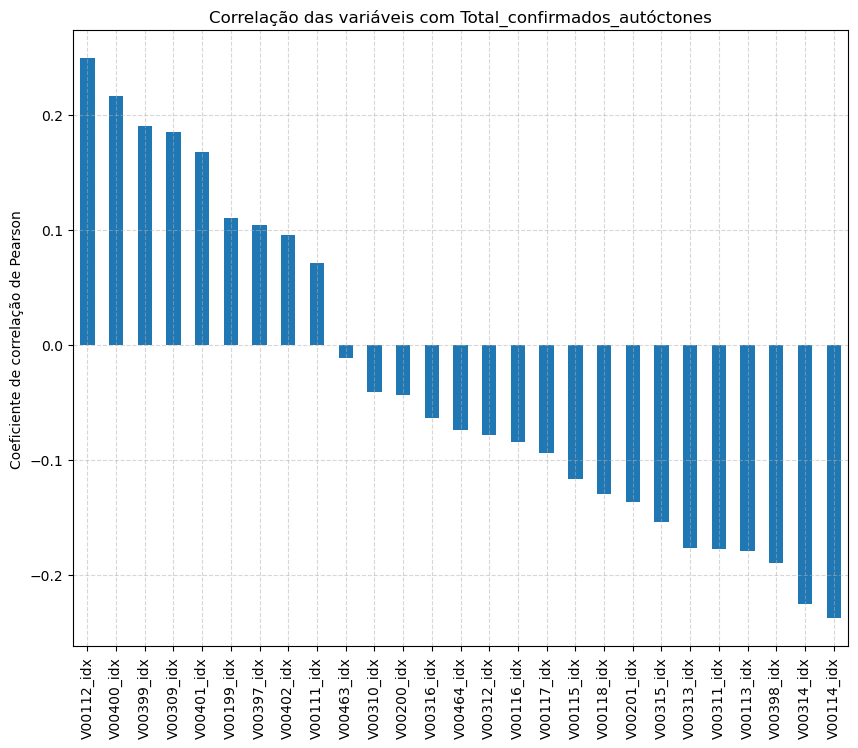

In [15]:
# Criação de um gráfico mostrando o Coeficiente de Correlação de Pearson 
# de cada uma das variáveis analisadas com relação à variável alvo
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr_ordenado.drop('Total_autoctone_ponderado').plot(kind='bar')
plt.title('Correlação das variáveis com Total_confirmados_autóctones')
plt.ylabel('Coeficiente de correlação de Pearson')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [16]:
# Importação de ferramentas para normalização, regressão linear e múltipla
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [17]:
# Nova declaração dos dados puramente numéricos
dados_numericos = dados_pop.select_dtypes(include=['int64', 'float64']).copy()

In [18]:
# Verificar se a coluna-alvo está presente
alvo = "Total_autoctone_ponderado"
if alvo not in dados_numericos.columns:
    raise ValueError(f"A coluna alvo '{alvo}' não foi encontrada nas colunas numéricas.")

In [19]:
# === Normalização (Min-Max) ===
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dados_norm = pd.DataFrame(scaler.fit_transform(dados_numericos),
                          columns=dados_numericos.columns)

In [20]:
print(dados_norm)

       CD_MUN  DRS__0_level_1__0  Região_de_Saúde__4_level_1__4  \
0   -1.713368          -0.142090                      -0.173446   
1   -1.707427           1.059302                       1.121446   
2   -1.701485           0.859070                       0.842546   
3   -1.695544           0.859070                       0.842546   
4   -1.689602          -0.542554                      -0.512110   
..        ...                ...                            ...   
639  1.698729           1.059302                       1.061681   
640  1.701610           1.259534                       1.260895   
641  1.707551           1.059302                       1.141367   
642  1.710492           1.059302                       1.121446   
643  1.713493          -0.142090                      -0.113682   

     Janeiro_notificados__7  Janeiro_confirmados_autóctones  \
0                 -0.106650                       -0.047656   
1                  0.507214                        0.634730   
2     

In [21]:
# Obter os dados normalizados em CSV, para disponibilização
dados_norm.to_csv('dados_normalizados.csv', index=False)

In [22]:
# === Correlação de Pearson (todas contra todas) ===
corr = dados_norm.corr(method='pearson')

In [23]:
# Ordenar correlações da variável alvo (do maior ao menor)
corr_alvo = corr[alvo].sort_values(ascending=False)
print("\nCorrelação de Pearson com a variável alvo:")
print(corr_alvo)


Correlação de Pearson com a variável alvo:
Total_autoctone_ponderado           1.000000
Março_confirmados_total             0.311297
Março_confirmados_autóctones        0.311198
Fevereiro_confirmados_total         0.295147
Fevereiro_confirmados_autóctones    0.293674
                                      ...   
V00314_idx                         -0.225478
V00114_idx                         -0.237738
V00051                                   NaN
CD_REGIAO                                NaN
CD_UF                                    NaN
Name: Total_autoctone_ponderado, Length: 186, dtype: float64


In [24]:
# === Regressão Linear Simples (cada variável vs. alvo) ===
print("\n=== Regressão Linear Simples ===")
for var in dados_norm.columns:
    if var == alvo:
        continue
    X = dados_norm[[var]]
    y = dados_norm[alvo]
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"{var}: R² = {r2:.4f}")


=== Regressão Linear Simples ===
CD_MUN: R² = 0.0013
DRS__0_level_1__0: R² = 0.0012
Região_de_Saúde__4_level_1__4: R² = 0.0017
Janeiro_notificados__7: R² = 0.0113
Janeiro_confirmados_autóctones: R² = 0.0448
Janeiro_confirmados_importados: R² = 0.0008
Fevereiro_notificados__10: R² = 0.0526
Fevereiro_confirmados_autóctones: R² = 0.0862
Fevereiro_confirmados_importados: R² = 0.0158
Março_notificados__13: R² = 0.0718
Março_confirmados_autóctones: R² = 0.0968
Março_confirmados_importados: R² = 0.0212
Abril_notificados__16: R² = 0.0345
Abril_confirmados_autóctones: R² = 0.0626
Abril_confirmados_importados: R² = 0.0025
Maio_notificados__19: R² = 0.0065
Maio_confirmados_autóctones: R² = 0.0292
Maio_confirmados_importados: R² = 0.0004
Junho_notificados__22: R² = 0.0004
Junho_confirmados_autóctones: R² = 0.0160
Junho_confirmados_importados: R² = 0.0005
Julho_notificados__25: R² = 0.0000
Julho_confirmados_autóctones: R² = 0.0107
Julho_confirmados_importados: R² = 0.0033
Julho_notificados__28: R²

In [25]:
# === Regressão Linear Múltipla (todas variáveis vs. alvo) ===
X = dados_norm.drop(columns=[alvo])
y = dados_norm[alvo]

modelo_multi = LinearRegression().fit(X, y)
y_pred_multi = modelo_multi.predict(X)

r2_multi = r2_score(y, y_pred_multi)
mae = mean_absolute_error(y, y_pred_multi)
rmse = np.sqrt(mean_squared_error(y, y_pred_multi))

print("\n=== Regressão Linear Múltipla ===")
print(f"R²: {r2_multi:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


=== Regressão Linear Múltipla ===
R²: 0.5628
MAE: 0.4534
RMSE: 0.6612


In [26]:
# === Selecionar variáveis independentes que começam com "V00", que são as do saneamento ===
variaveis_v00 = [col for col in dados_numericos.columns if col.startswith("V00")]

In [27]:
# === Criar novo DataFrame apenas com as variáveis relevantes ===
dados_filtrados = dados_numericos[variaveis_v00 + [alvo]]

In [28]:
# === Normalização (Min-Max) ===
scaler = StandardScaler()
dados_norm = pd.DataFrame(scaler.fit_transform(dados_filtrados),
                          columns=dados_filtrados.columns)

In [29]:
# === Correlação de Pearson ===
corr = dados_norm.corr(method='pearson')
corr_alvo = corr[alvo].sort_values(ascending=False)

print("\nCorrelação de Pearson (variáveis V00... vs Total_autoctone_ponderado):")
print(corr_alvo)


Correlação de Pearson (variáveis V00... vs Total_autoctone_ponderado):
Total_autoctone_ponderado    1.000000
V00112_idx                   0.249106
V00400_idx                   0.216554
V00399_idx                   0.190239
V00309_idx                   0.184772
                               ...   
V00114                      -0.201329
V00122                      -0.202754
V00314_idx                  -0.225478
V00114_idx                  -0.237738
V00051                            NaN
Name: Total_autoctone_ponderado, Length: 127, dtype: float64


In [30]:
# === Regressão Linear Múltipla (todas as V00... como independentes) ===
X = dados_norm[variaveis_v00]
y = dados_norm[alvo]

modelo = LinearRegression().fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\n=== Regressão Linear Múltipla (variáveis V00...) ===")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


=== Regressão Linear Múltipla (variáveis V00...) ===
R²: 0.3100
MAE: 0.5641
RMSE: 0.8307


In [31]:
# === (Opcional) Mostrar os coeficientes ordenados ===
coeficientes = pd.Series(modelo.coef_, index=variaveis_v00).sort_values(ascending=False)
print("\nCoeficientes (influência de cada variável):")
print(coeficientes)


Coeficientes (influência de cada variável):
V00004    2.397352e+10
V00005    5.469684e+03
V00111    3.130931e+03
V00199    1.221143e+03
V00397    8.565199e+02
              ...     
V00612   -7.574208e+02
V00049   -8.751302e+02
V00119   -9.610293e+02
V00508   -3.346897e+03
V00001   -2.397353e+10
Length: 126, dtype: float64


In [32]:
import seaborn as sns
import statsmodels.api as sm


Top 10 variáveis mais correlacionadas positivamente:
Total_autoctone_ponderado    1.000000
V00112_idx                   0.249106
V00400_idx                   0.216554
V00399_idx                   0.190239
V00309_idx                   0.184772
V00401_idx                   0.167820
V00199_idx                   0.110704
V00397_idx                   0.104629
V00402_idx                   0.095514
V00400                       0.094211
Name: Total_autoctone_ponderado, dtype: float64

Top 10 variáveis mais correlacionadas negativamente:
V00312       -0.191869
V00637       -0.194762
V00464       -0.196005
V00466       -0.196778
V00511       -0.198702
V00114       -0.201329
V00122       -0.202754
V00314_idx   -0.225478
V00114_idx   -0.237738
V00051             NaN
Name: Total_autoctone_ponderado, dtype: float64


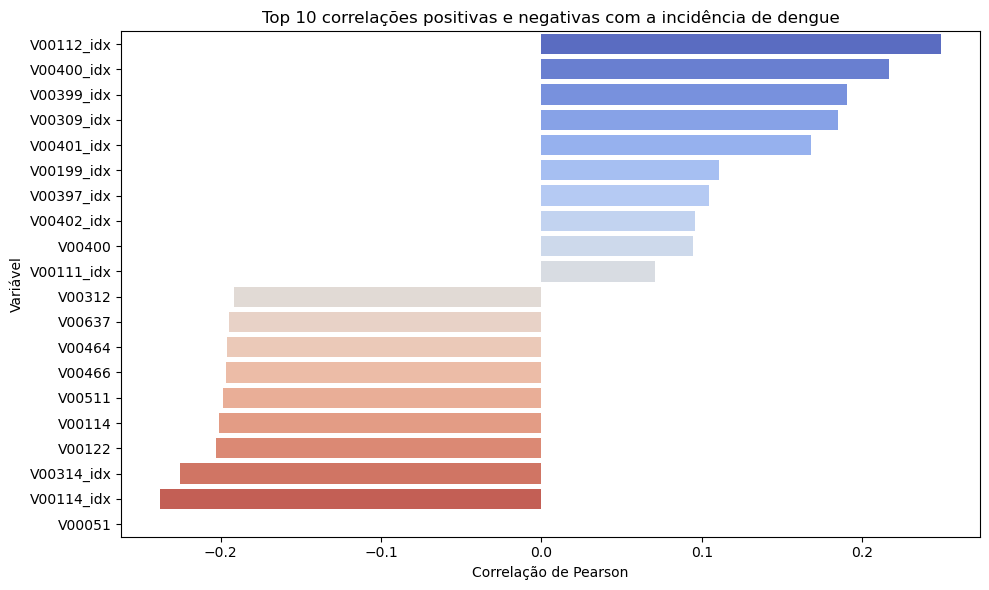

In [53]:
top_n = 10  # número de variáveis a exibir
print(f"\nTop {top_n} variáveis mais correlacionadas positivamente:")
print(corr_alvo.head(top_n))

print(f"\nTop {top_n} variáveis mais correlacionadas negativamente:")
print(corr_alvo.tail(top_n))

# === Gráfico de barras para as mais e menos correlacionadas ===
corr_a = corr_alvo.drop(alvo)
top_pos = corr_a.head(top_n)
top_neg = corr_a.tail(top_n)

# Concatenar para exibir juntas
corr_top = pd.concat([top_pos, top_neg])

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_top.values, y=corr_top.index, palette="coolwarm")
plt.title(f"Top {top_n} correlações positivas e negativas com a incidência de dengue")
plt.xlabel("Correlação de Pearson")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

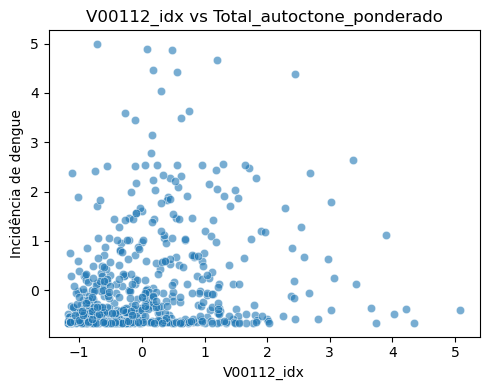

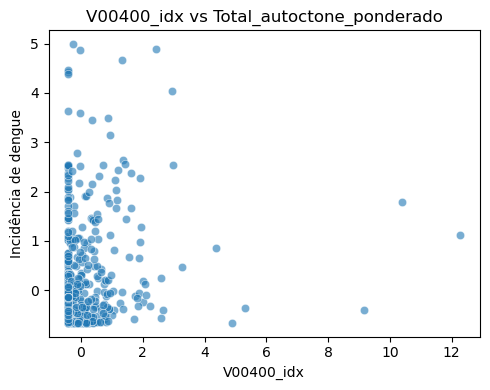

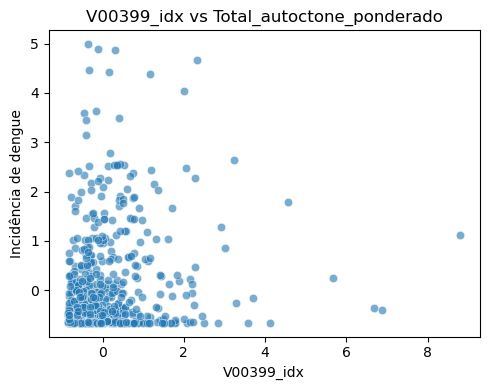

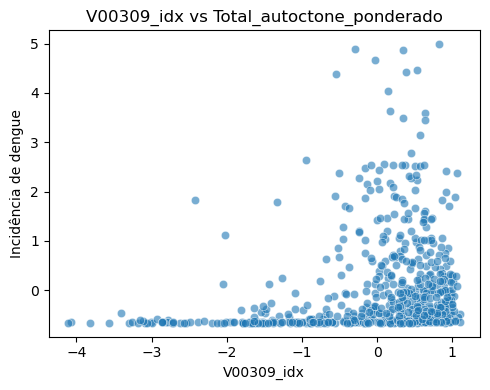

In [45]:
top_vars = corr_alvo.drop(alvo).head(4).index  # 4 variáveis mais correlacionadas
for var in top_vars:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=dados_norm[var], y=dados_norm[alvo], alpha=0.6)
    plt.title(f"{var} vs Total_autoctone_ponderado")
    plt.xlabel(f"{var}")
    plt.ylabel("Incidência de dengue")
    plt.tight_layout()
    plt.show()

In [34]:
# === Regressão Linear Múltipla (novamente) ===
X = dados_norm[variaveis_v00]
y = dados_norm[alvo]

modelo = LinearRegression().fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\n=== Regressão Linear Múltipla ===")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


=== Regressão Linear Múltipla ===
R²: 0.3100
MAE: 0.5641
RMSE: 0.8307


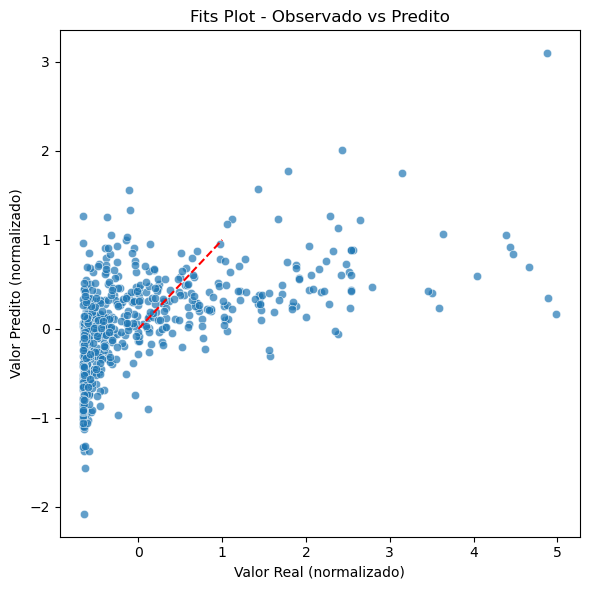

In [35]:
# === Gráfico Fits Plot (observado vs predito) ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred_multi, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Linha 45° ajustada
plt.xlabel("Incidência de Dengue (real)")
plt.ylabel("Incidência de Dengue (predita)")
plt.title("Fits Plot - Observado vs Predito (Regressão Múltipla)")
plt.tight_layout()
plt.show()

In [3]:
# === Q-Q Plot dos resíduos ===
residuos = y - y_pred

sm.qqplot(residuos, line='45', fit=True)
plt.title("Q-Q Plot dos Resíduos")
plt.tight_layout()
plt.show()

NameError: name 'dados_norm' is not defined

C:\Users\Nazivon Santos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


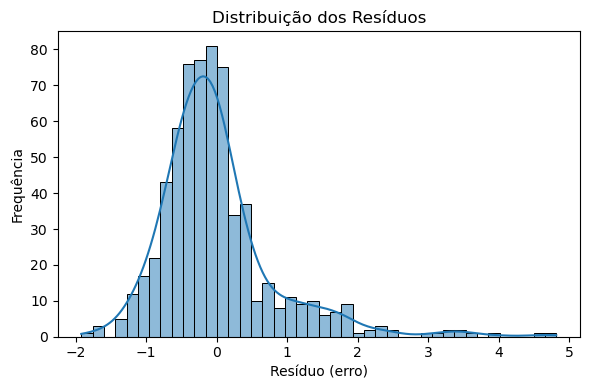

In [37]:
# === Histograma dos resíduos ===
plt.figure(figsize=(6, 4))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo (erro)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()